In [1]:
import itertools
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
nike = pd.read_csv("data/nike.csv")

print("Basic information about our Nike.com dataset:\n")
print(nike.info())
print(
    "\n\nA little more summary info about our data "
    "(there\nare only a few columns in our data, making "
    "this\neasy to inspect):\n\n",
    nike.describe(),
)
print("\n\nAnd, the first few rows of our data:")
display(nike.head())

Basic information about our Nike.com dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1368 non-null   int64  
 1   label          409 non-null    object 
 2   title          1368 non-null   object 
 3   subtitle       1367 non-null   object 
 4   num_colors     1368 non-null   object 
 5   price          1366 non-null   object 
 6   reduced_price  579 non-null    object 
 7   url            1368 non-null   object 
 8   description    1340 non-null   object 
 9   colors         840 non-null    object 
 10  n_reviews      1271 non-null   float64
 11  avg_stars      1271 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 128.4+ KB
None


A little more summary info about our data (there
are only a few columns in our data, making this
easy to inspect):

         Unnamed: 0    n_reviews    avg_sta

,Unnamed: 0,label,title,subtitle,num_colors,price,reduced_price,url,description,colors,n_reviews,avg_stars
0,0,Best Seller,Air Jordan 1 Mid,Shoes,2 Colors,$125,NaN,https://www.nike.com/t/air-jordan-1-mid-shoes-...,"Inspired by the original AJ1, the Air Jordan 1...",Black/White/Fire Red; Black/Black/Black,2161.0,4.9
1,1,Best Seller,Nike Blazer Mid '77 Vintage,Women's Shoes,3 Colors,$105,NaN,https://www.nike.com/t/blazer-mid-77-vintage-w...,Styled for the ‘70s. Loved in the ‘80s. Classi...,White/White/Peach/White; White/Sail/Peach/Blac...,519.0,4.8
2,2,Coming Soon,Nike Dunk Low Retro,Men's Shoes,1 Color,$110,NaN,https://www.nike.com/t/dunk-low-retro-mens-sho...,Created for the hardwood but taken to the stre...,NaN,NaN,NaN
3,3,Best Seller,Nike Air Force 1 '07,Men's Shoes,2 Colors,$110,NaN,https://www.nike.com/t/air-force-1-07-mens-sho...,The radiance lives on in the Nike Air Force 1 ...,Black/White; White/Black; Design your own Nike...,128.0,4.9
4,4,Best Seller,Air Jordan 12 Retro,Men's Shoes,1 Color,$200,NaN,https://www.nike.com/t/air-jordan-12-retro-men...,No need to call for a ride—MJ's game-winning l...,NaN,333.0,4.9


In [3]:
nike['price'] = nike['price'].str.replace('$','').astype(np.float64)
nike['num_colors'] = nike['num_colors'].str.replace(' Colors','').str.replace(' Color','').astype(np.float64)

/var/folders/p1/k8vv7kdn7bd5kw2wgb_g3q580000gn/T/ipykernel_80815/405425822.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nike['price'] = nike['price'].str.replace('$','').astype(np.float64)


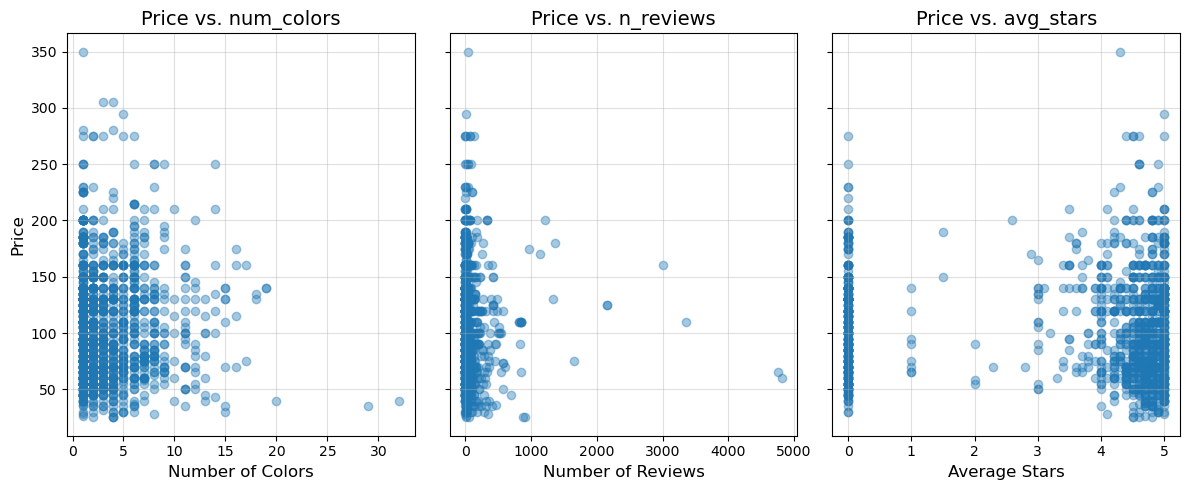

In [4]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(12, 5))

fontsize = 14

cols = ["num_colors", "n_reviews", "avg_stars"] 
title_vs_text = ["num_colors", "n_reviews", "avg_stars"]
xlabels = ["Number of Colors", "Number of Reviews", "Average Stars"]

for i, (ax, col, title_vs, xlabel) in enumerate(
    zip(axes, cols, title_vs_text, xlabels)
):

    ax.scatter(nike[col], nike["price"], alpha=0.4)
    ax.set_title(
        f"Price vs. {title_vs}",
        fontsize=fontsize,
    )
    ax.set_xlabel(xlabel, fontsize=fontsize-2)
    ax.set_ylabel(
        "Price" if i==0 else None, 
        fontsize=fontsize-2
    )
    ax.grid(":", alpha=0.4)

plt.tight_layout()

In [5]:
mean_price = nike["price"].mean() 
mean_noc = nike["num_colors"].mean()
std_price = nike["price"].std() 
std_noc = nike["num_colors"].std()
print(
    "\n"
    f"The mean price is {mean_price:.4f} \n"
    f"The mean number of colors is {mean_noc:.4f} \n"
    f"The Standard Deviation of price is {std_price:.4f}\n"
    f"The Standard Deviation of number of colors is {std_noc:.4f}"
)


The mean price is 108.3433 
The mean number of colors is 3.5322 
The Standard Deviation of price is 47.8272
The Standard Deviation of number of colors is 3.3771


In [6]:
price_min = nike["price"].min()
price_max = nike["price"].max() 
price_range = price_max - price_min 

print(
    f"The range of price for which shoes in our dataset "
    f"is {price_range:,.2f} dolloars. \n\n"
    f"The maximum number of price is {price_max:,.2f}, "
    f"and the minimum is {price_min:,.2f}."
)

The range of price for which shoes in our dataset is 325.00 dolloars. 

The maximum number of price is 350.00, and the minimum is 25.00.


In [12]:
n_rows_with_missingness = np.int64(sum([True for idx,row in nike.iterrows() if any(row.isnull())]))
n_cols_with_missingness = np.int64(sum(nike.apply(lambda x: sum(x.isnull().values), axis = 0)>0))

columns = nike.columns.values
col_num = []
for i in columns:
    col_num.append(nike[i].isnull().sum())
col_missingness = pd.Series(col_num, index=nike.columns)
col_missingness

Unnamed: 0         0
label            959
title              0
subtitle           1
num_colors         0
price              2
reduced_price    789
url                0
description       28
colors           528
n_reviews         97
avg_stars         97
dtype: int64

In [15]:
median_price = nike['price'].median()
nike['price'].fillna(median_price, inplace=True)

In [7]:
X = nike[['num_colors']]
y = nike['price']

nike_train, nike_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=109)

print(nike.shape)
print(nike_train.shape, nike_test.shape)
nike_train.info()

(1368, 12)
(1094, 1) (274, 1)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 45 to 1286
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   num_colors  1094 non-null   float64
dtypes: float64(1)
memory usage: 17.1 KB


In [16]:
ks = [1,2,3,5,7,10,50,100]
#to store predicted values
all_preds=[]
x_lin=np.linspace(X[['num_colors']].min(), X[['num_colors']].max(), 1000)

#store predicted values for each k
for k in ks:
    cur_knn = KNeighborsRegressor(n_neighbors=int(k)).fit(nike_train, y_train).predict(x_lin)
    all_preds.append(cur_knn)

ValueError: Input y contains NaN.

In [ ]:
fig, axes = plt.subplots(4,2, figsize=(12, 14))
axes = axes.ravel()

for k, cur_preds, ax in zip(ks, all_preds, axes):
    ax.scatter(nike_train, y_train, alpha=0.45, label='train')
    ax.scatter(nike_test, y_test, alpha=0.45, label='test')
    ax.plot(x_lin, cur_preds, c='k', label='predictions');
    ax.set_xlabel('Number of Colors')
    ax.set_ylabel('Price')
    ax.set_title(f'kNN Regression Model (k={k})')
    ax.legend();
    
plt.tight_layout()

In [ ]:
# nike_train, y_train = nike_train.drop(columns=['price']), nike_train['price']
# nike_test, y_test = nike_test.drop(columns=['price']), nike_test['price']

In [ ]:
# nike_train, y_train = nike_train.drop(columns=['reduced_price']), nike_train['reduced_price']
# nike_test, y_test = nike_test.drop(columns=['reduced_price']), nike_test['reduced_price']

In [ ]:
# columns = nike_train.columns.values
# print(f'There are {len(columns)} in the Nike_train Data Frame:')
# for i in columns:
    # print(f'  The {i} column is missing {nike_train[i].isnull().sum()} values')